
# Importing Libraries


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [32]:
data=pd.read_csv('bitcoin.csv')

# Examining Data

In [33]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [34]:
print("Shape of the Data: "+str(data.shape))

Shape of the Data: (2713, 7)


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


In [36]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


# EDA

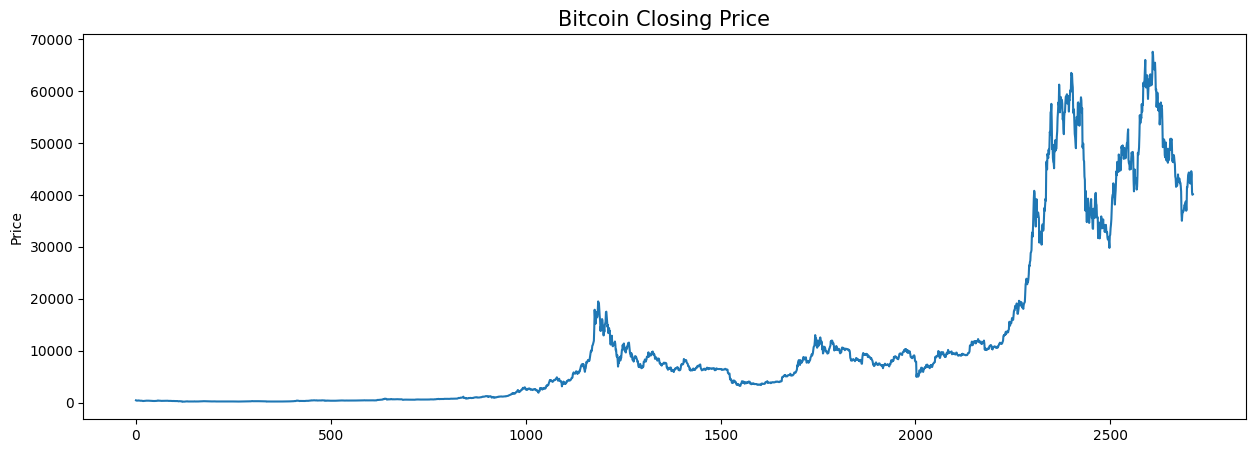

In [37]:
plt.figure(figsize=(15,5))
plt.plot(data['Close'])
plt.title('Bitcoin Closing Price', fontsize=15)
plt.ylabel('Price')
plt.show()

In [38]:
data[data['Close']==data['Adj Close']].shape, data.shape

((2713, 7), (2713, 7))

This concludes both 'Close' and 'Adj Close' contains the same data. Hence, we will drop 'Adj Close'.

In [39]:
data=data.drop('Adj Close', axis=1)

# Checking for null values.

In [40]:
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


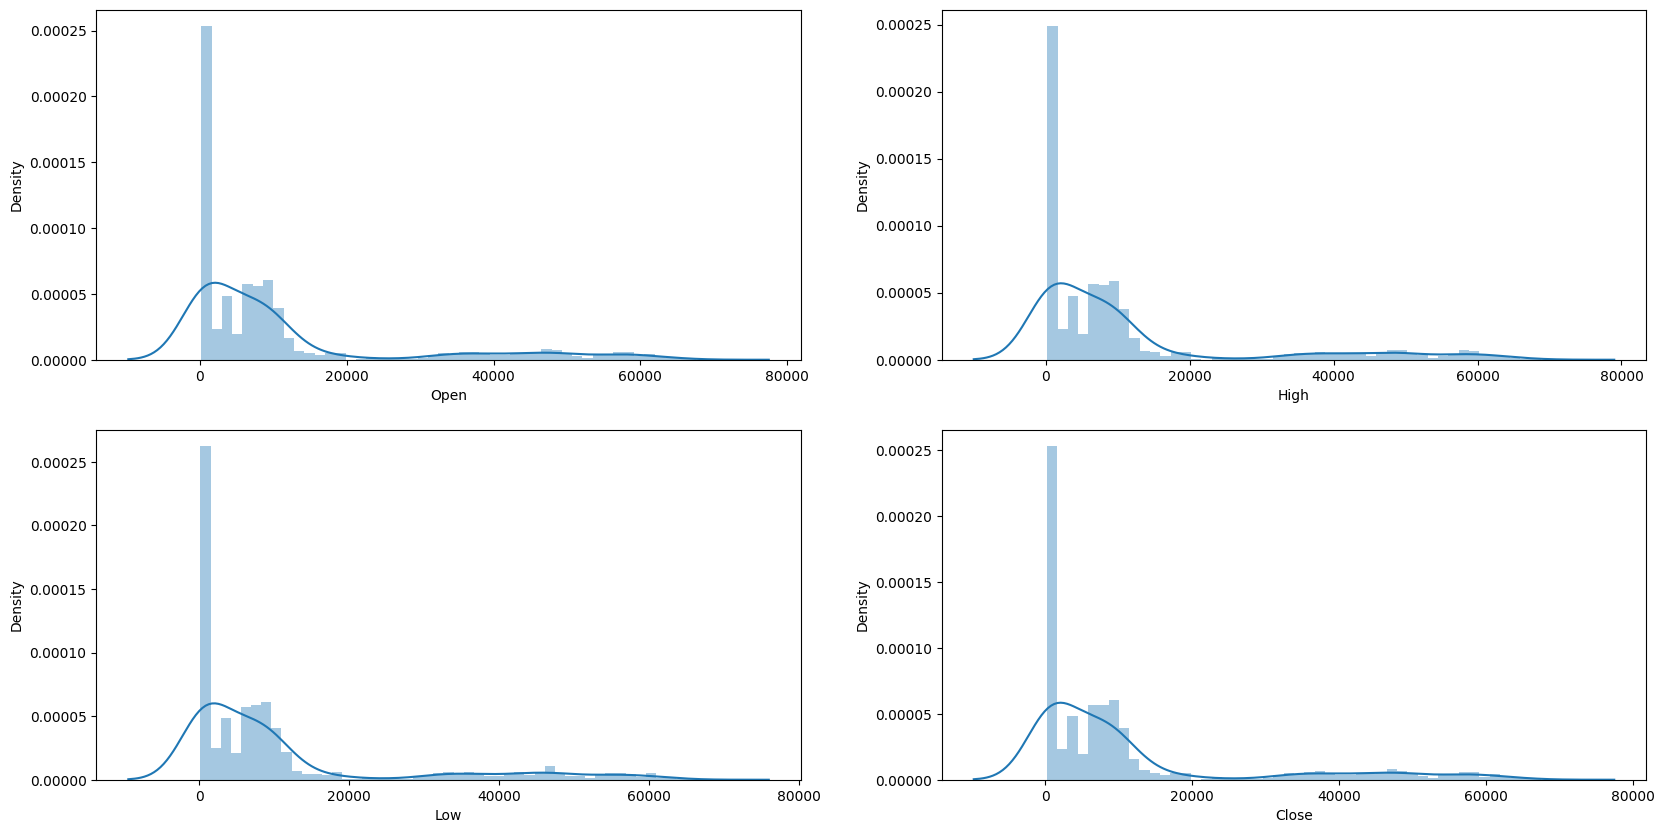

In [41]:
features=['Open','High','Low','Close']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.distplot(data[col])
plt.show()

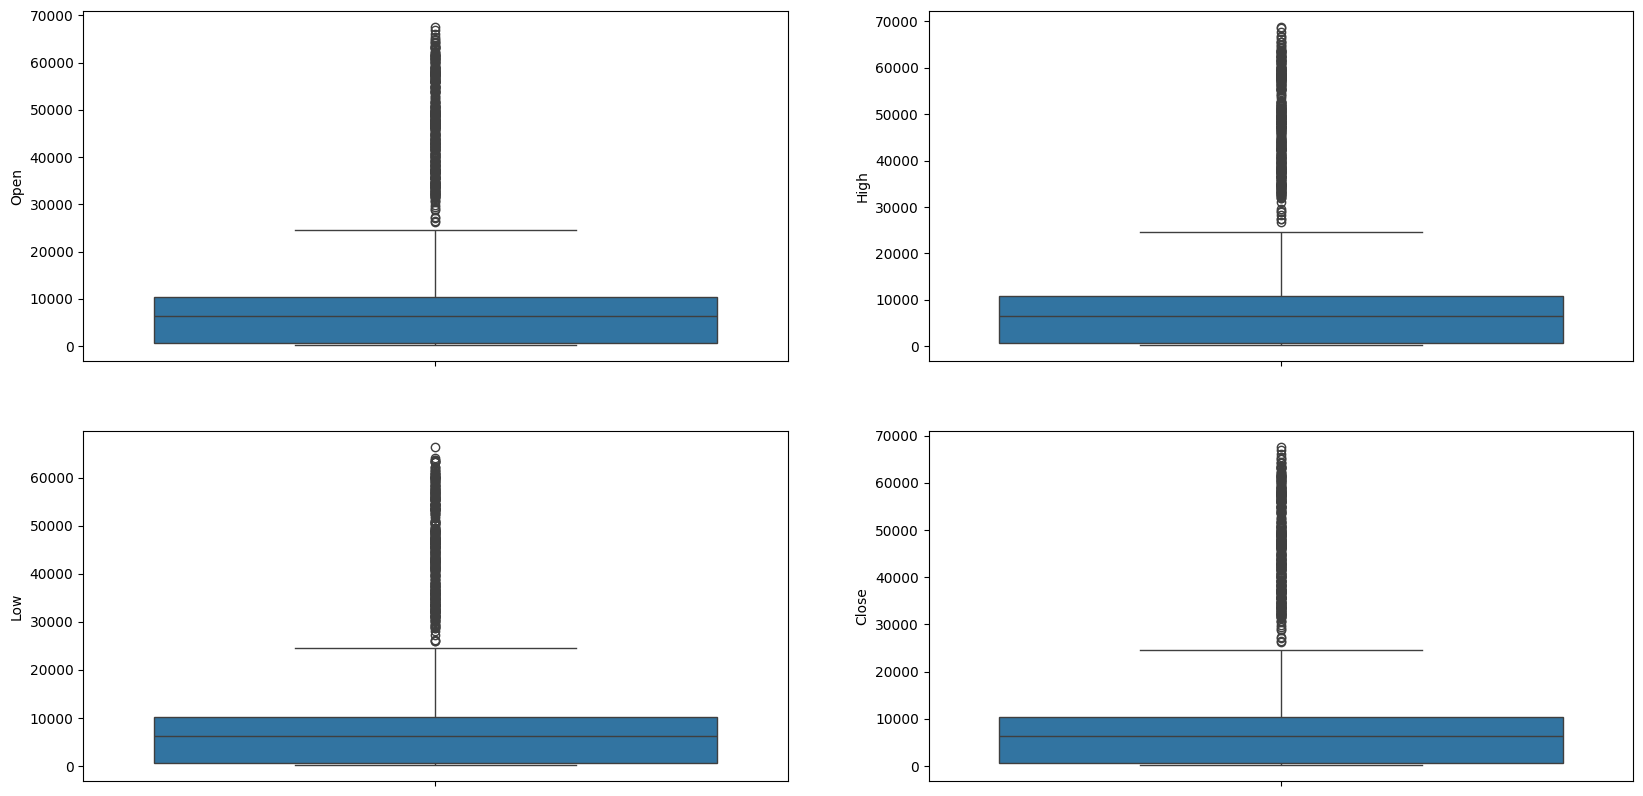

In [42]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.boxplot(data[col])
plt.show()

# Feature Engineering


In [43]:
splitted=data['Date'].str.split('-', expand=True)
data['Year']=splitted[0].astype(int)
data['Month']=splitted[1].astype(int)
data['Day']=splitted[2].astype(int)

data['Date']=pd.to_datetime(data['Date'])
data.head()

,Date,Open,High,Low,Close,Volume,Year,Month,Day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21


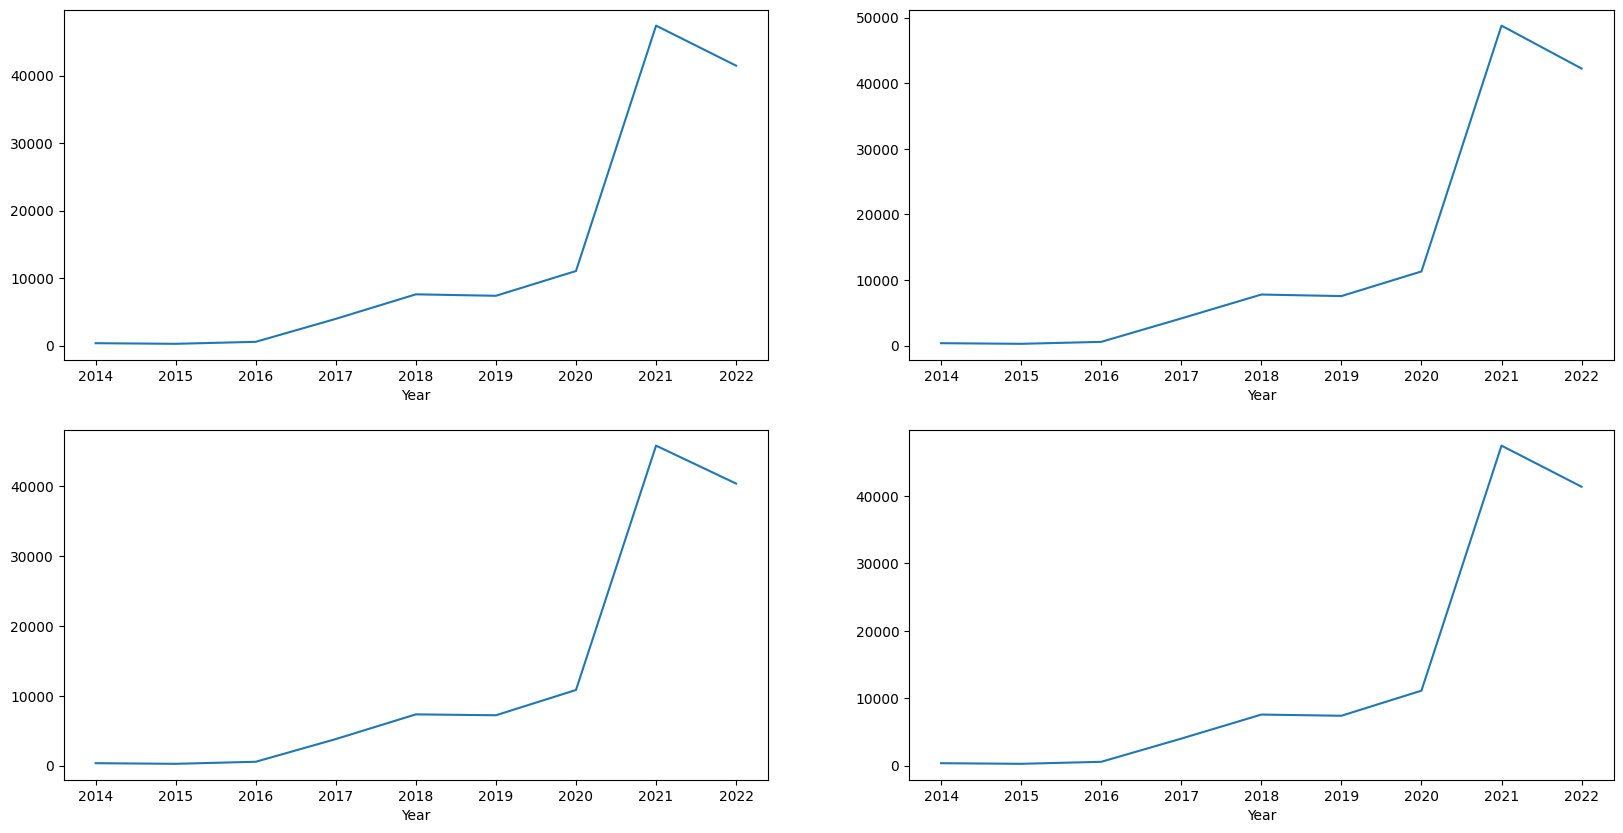

In [44]:
data_grouped=data.groupby('Year').mean()

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot()
plt.show()

Price of bitcoin exploded in 2021 which resulted in excessive amount of outliers.

In [45]:
data['is_quarter_end']=np.where(data['Month']%3==0,1,0)
data.head()

,Date,Open,High,Low,Close,Volume,Year,Month,Day,is_quarter_end
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1


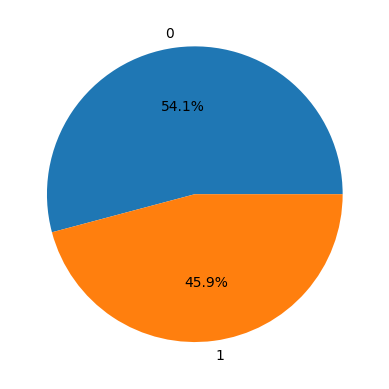

In [46]:
data['open-close']=data['Open']-data['Close']
data['low-high']=data['Low']-data['High']
data['target']=np.where(data['Close'].shift(-1)>data['Close'],1,0)

# Creating a pie chart

plt.pie(data['target'].value_counts().values,labels=[0,1],autopct='%1.1f%%')
plt.show()

# Plotting Heatmap

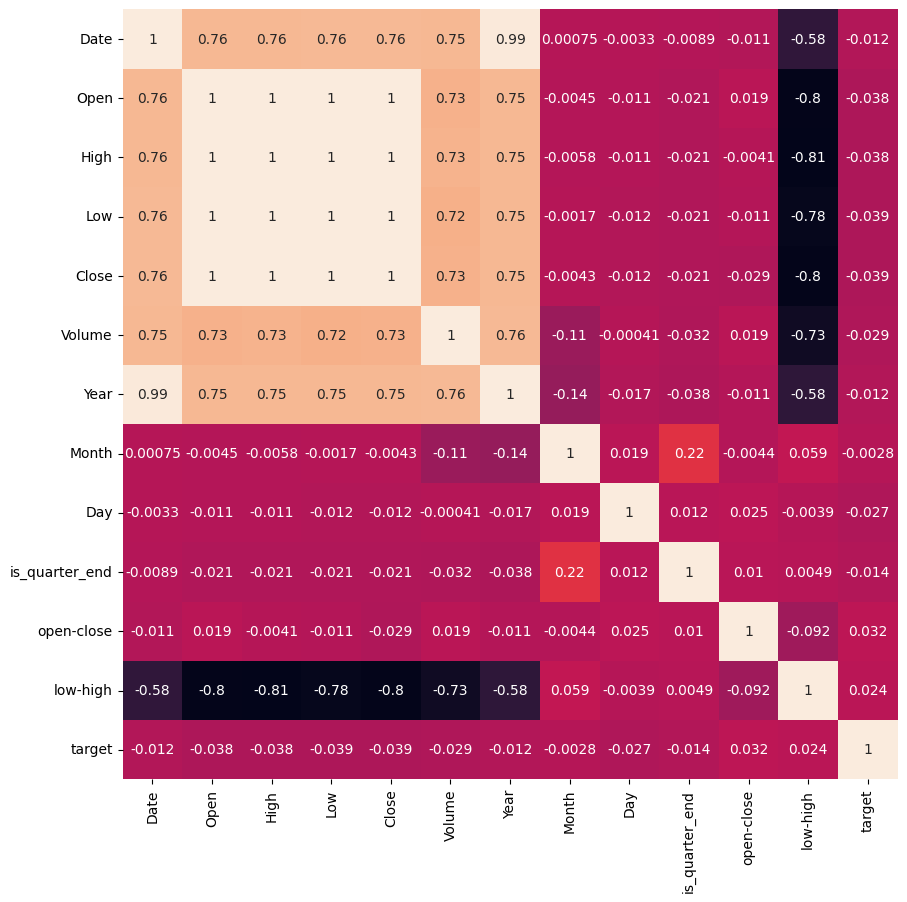

In [47]:
plt.figure(figsize=(10,10))

sns.heatmap(data.corr(), annot=True,cbar=False)
plt.show()

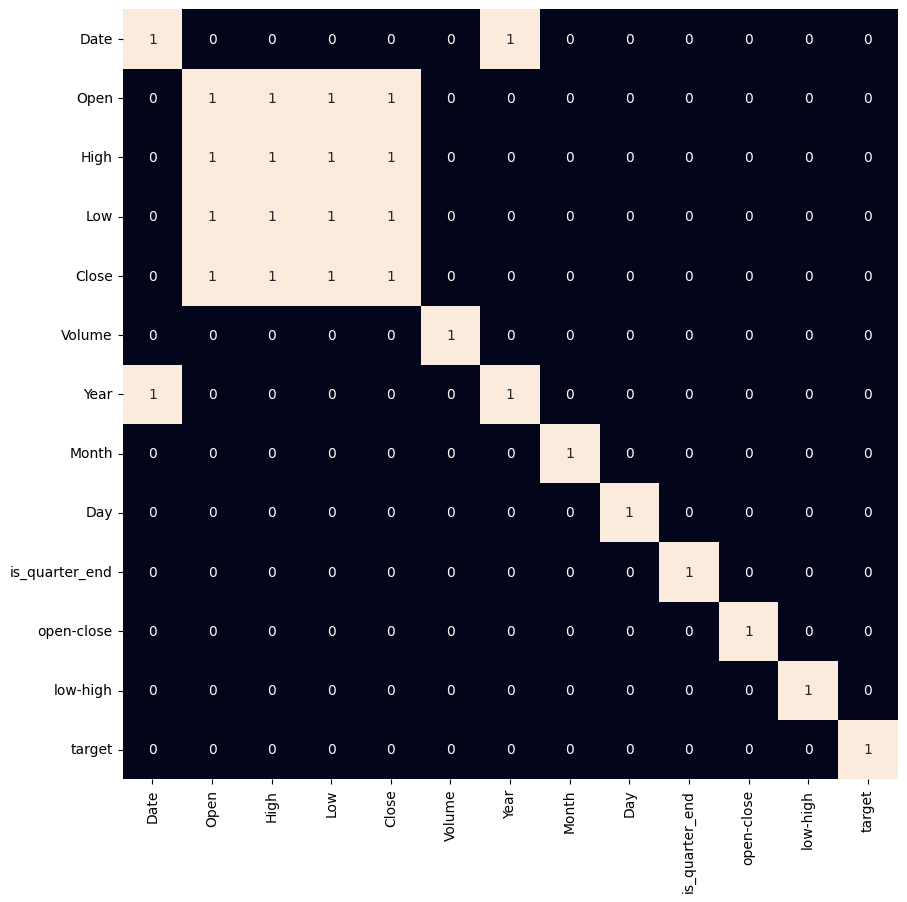

In [48]:
plt.figure(figsize=(10,10))

sns.heatmap(data.corr()>0.9, annot=True,cbar=False)
plt.show()

This concludes that the features we added are not highly correlated.

# Splitting the Data

In [49]:
features=data[['open-close','low-high','is_quarter_end']]
target=data['target']

scaler=StandardScaler()
features=scaler.fit_transform(features)

In [50]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.1,random_state=2022)

print("Shape of x_train: "+str(x_train.shape))
print("Shape of y_train: "+str(y_train.shape)+"\n")

print("Shape of x_test: "+str(x_test.shape))
print("Shape of y_test: "+str(y_test.shape))

Shape of x_train: (2441, 3)
Shape of y_train: (2441,)

Shape of x_test: (272, 3)
Shape of y_test: (272,)


# Model Development

In [51]:
models=[LogisticRegression(),SVC(kernel='poly', probability=True),XGBClassifier()]

for i in range(3):
  models[i].fit(x_train,y_train)
  print(str(models[i])+": \n")
  print('Training Accuracy :',metrics.roc_auc_score(y_train,models[i].predict_proba(x_train)[:,1]))
  print('Testing Accuracy : ',metrics.roc_auc_score(y_test,models[i].predict_proba(x_test)[:,1]))
  print("\n")

LogisticRegression(): 

Training Accuracy : 0.5272712493564907
Testing Accuracy :  0.5187429004165088


SVC(kernel='poly', probability=True): 

Training Accuracy : 0.4828745224483161
Testing Accuracy :  0.5278844593498134


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...): 

Training Accura

XGBClassifier performed better than Logistic Regression and SCV, but is overfitting as Testing Accuracy is significantly less than that of Training Accuracy. This difference is significantly less in that of Logistic Regression.

# Confusion Matrix for using Logistic Regression Model

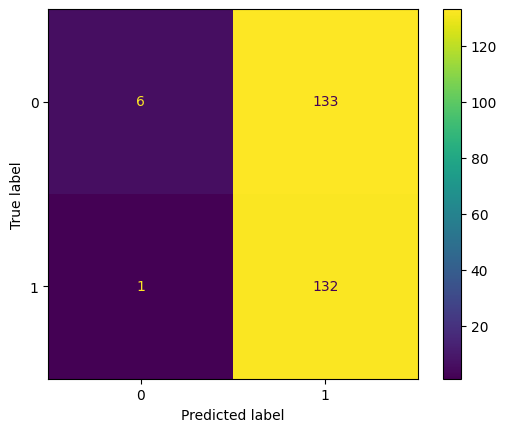

In [52]:
ConfusionMatrixDisplay.from_estimator(models[0],x_test,y_test)
plt.show()

# Confusion Matrix for using SVC

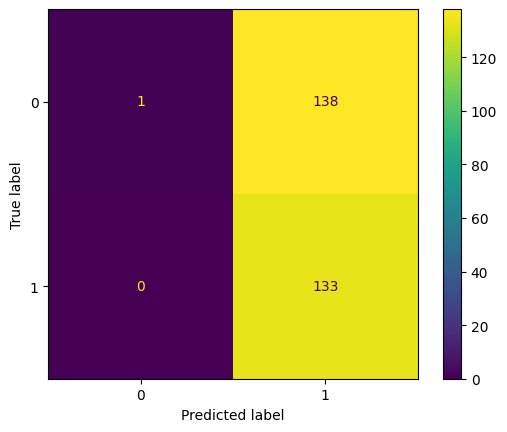

In [53]:
ConfusionMatrixDisplay.from_estimator(models[1],x_test,y_test)
plt.show()

# Confusion Matrix for using XGBClassifier model

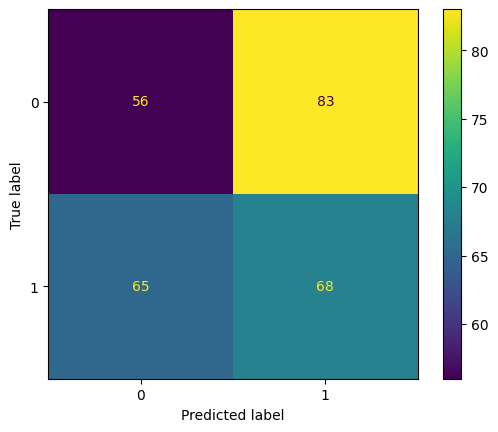

In [54]:
ConfusionMatrixDisplay.from_estimator(models[2],x_test,y_test)
plt.show()